<a href="https://colab.research.google.com/github/shotea/murder_mystery/blob/main/murder_mystery.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

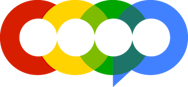
# **COOP SQL 104: Murder Mystery**

Adapted by: Reina Li

Last updated: October 10, 2024

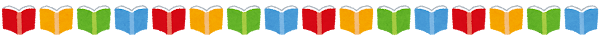

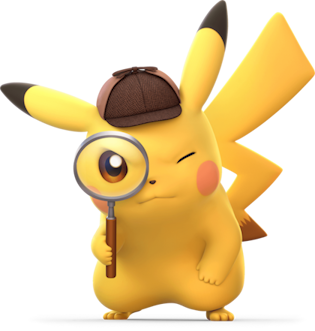

**Credits:** He, C. and Park, J. (2017) SQL Murder Mystery by Knight Lab [Repository]. https://github.com/NUKnightLab/sql-mysteries

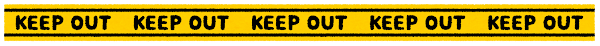

# 🙂 **Introduction to Google Colab**

Google Colaboratory is a Jupyter Notebook hosted on Google's cloud platform! Google Colab allows you to write and execute Python in your browser. Colab notebooks allow you to combine executable code and rich text in a single document, along with images, HTML, LaTeX and more. When you create your own Colab notebooks, they are stored in your Google Drive account. You can easily share your Colab notebooks with co-workers or friends, allowing them to comment on your notebooks or even edit them. To learn more, see [Overview of Colab](https://colab.research.google.com/notebooks/basic_features_overview.ipynb).

## 🧰 **Set up notebook to load database and be able to run SQL queries**

Since Google Colab is a Jupyter Notebook, you can write and run Python code and scripts. For COOP, we will be using these notebooks to run our SQL queries. In order for this notebook to be able to run SQL queries, we are going to use a Python library called `DuckDB`. To learn more, see [DuckDB](https://duckdb.org/docs/sql/introduction). `teachdb` is a Python library that was written by The Freestack Initiative, a group of COOP alumni who want to empower the community to learn and improve their technical skills by providing materials and resources at low (or no) cost.

In [ ]:
%%capture --no-stderr
# @title ### 🏃 **Press play to run** { display-mode: "form" }

# Install `teachdb` and `coop_grader`
print("Installing `teachdb` and its dependencies...")
%pip install --quiet --upgrade git+https://github.com/freestackinitiative/teachingdb.git git+https://github.com/martinmarroyo/coop_grader.git
print("Successfully installed `teachdb`")
from teachdb.teachdb import connect_teachdb
from coop_grader.sql_murder_mystery.check_suspect import check_suspect
# Set configurations for notebook & load data
con = connect_teachdb(database="sql_murder_mystery")

%sql con

line_dots1_red.pngline_dots3_yellow.pngline_dots4_green.pngline_dots5_blue.png

# 🚓 **Scenario**

A crime has taken place and detectives need your help! You were given the crime scene report, but you somehow lost it. You vaguely remember that the crime was a murder that occurred sometime on **January 15, 2018** and that it took place in **SQL City**. It is up to you to find out who the murderer is using just your SQL skills and resourcefulness. You are given a connection to the Police Department's database which has all of the clues you'll need to track down the killer.

## 🚨 **Police Department's Database**

We start our quest to find the murderer by exploring the Police Department database. But you haven't seen the database yet, and you don't know what the tables are, so how do you know what to look for?

Thankfully, most relational database management systems have this information stored in a place where you can query it. Very often, a special schema known as the [`information_schema`](https://en.wikipedia.org/wiki/Information_schema) is used to store information about the tables and columns in your database (aka metadata.) The Police Department's database has an information schema, with the `tables` view showing you what tables are available, and the `columns` view which shows you all the columns for each table and their data types.

So, let's start off by using `information_schema.tables` to view what tables are available in the database.

In [ ]:
%%sql

SELECT table_name
FROM information_schema.tables

,table_name
0,crime_scene_report
1,drivers_license
2,facebook_event_checkin
3,get_fit_now_check_in
4,get_fit_now_member
5,income
6,interview
7,person


👏👏👏 Alrighty!!! Now that we can see the names of all the tables available in the Police Department database, let's use `information_schema.columns` to view more information about the columns in each of those tables!

Write a query that shows the `table_name`, `column_name`, and `data_type` for each table in the Police Department database using the `information_schema.columns` view. Make sure that the output is ordered by `table_name`, then `column_name` (ascending).

<details>
  <summary>Check Reina's answer here!</summary>

```sql
SELECT table_name, column_name, data_type
FROM information_schema.columns
```
</details>

In [ ]:
%%sql
SELECT table_name, column_name, data_type
FROM information_schema.columns
ORDER BY table_name, column_name


,table_name,column_name,data_type
0,crime_scene_report,city,VARCHAR
1,crime_scene_report,date,INTEGER
2,crime_scene_report,description,VARCHAR
3,crime_scene_report,type,VARCHAR
4,drivers_license,age,INTEGER
5,drivers_license,car_make,VARCHAR
6,drivers_license,car_model,VARCHAR
7,drivers_license,eye_color,VARCHAR
8,drivers_license,gender,VARCHAR
9,drivers_license,hair_color,VARCHAR


## 🚨 **Entity Relationship Diagram (ERD)**

After doing some detective work and finding the tables in the Police Department database, you discover that there is an entity relationship diagram (ERD)! This can be really helpful in your quest to find the murderer. If you like, challenge yourself (and your SQL skills) to continue on by just querying the `information_schema` as needed. Otherwise, you can click the dropdown below to reveal the ERD to help you see the tables and relationships in the Police Department database at a glance:

<details>
  <summary>Check the SQL Murder Mystery ERD</summary>
  <img src="https://github.com/freestackinitiative/coop_sql_notebooks/blob/v2/assets/murder_mystery_schema.png?raw=1" alt="ERD for SQL Murder Mystery"/>
</details>

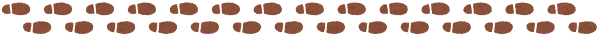

# 🕵 **Investigation Time!**

📌 **What we know so far:**
1. The crime happened on January 15, 2018.
2. The murder happened in SQL City.

Let's start by looking at the police's `crime_scene_report` for this specific case! We are interested in looking at the what the police wrote down for the `description` for this report.

<details>
  <summary>Check Reina's answer here!</summary>

```sql
SELECT description
FROM crime_scene_report
WHERE date = 20180115
AND type = 'murder'
AND city = 'SQL City'
```
</details>

In [ ]:
%%sql
SELECT description
FROM crime_scene_report
WHERE type = 'murder'
AND city = 'SQL City'
AND date = 20180115


,description
0,Security footage shows that there were 2 witnesses. The first witness lives at the last house o...


## 👥 **Witness 1**

📌 **What we know so far:**
1. The crime happened on January 15, 2018.
2. The murder happened in SQL City.
3.
<details>
  <summary></summary>
There are 2 witnesses in this case.
</details>
4.
<details>
  <summary></summary>
First witness lives in the last house on `Northwestern Dr`.
</details>
5.
<details>
  <summary></summary>
Second witness is named `Annabel` and lives somewhere on `Franklin Ave`.
</details>


---


Since we have some witnesses, let's look more into each of them, and specifically look at what they said during their `interview`s with the Police Department. From the `crime_scene_report`, we are provided with some information about our witnesses. Witness 1 lives on the last house on `Northwestern Dr`. And Witness 2 is named `Annabel` and lives somewhere on `Franklin Ave`.

Let's look into Witness 1. In order to access their `interview` `transcript`, we need to know their `person.id`. But we don't even know their name or exact address, so where do we start? We do know that Witness 1 lives on the last house of `Northwestern Dr`. Which table in the Police Department database will give us more information about someone?


---


👏👏👏 Yes, it's the `person` table! Let's find which house number our first witness lives in. 🏠

<details>
  <summary>Check Reina's answer here!</summary>

```sql
SELECT MAX(address_number)
FROM person
WHERE address_street_name = 'Northwestern Dr'
```
</details>

In [ ]:
%%sql

SELECT MAX(address_number)
FROM person
WHERE address_street_name = 'Northwestern Dr'



,max(address_number)
0,4919


📌 **What we know so far:**
1. The crime happened on January 15, 2018.
2. The crime happened in SQL City.
3. There are 2 witnesses in this case.
4. First witness lives in the last house on `Northwestern Dr`.
5. Second witness is named `Annabel` and lives somewhere on `Franklin Ave`.
6.
<details>
  <summary></summary>
The house number of the first witness is `4919`.
</details>


---

🚪 Okay, we found out that witness 1 lives in 4919 Franklin Ave. But we still need their `person.id`. Let's continue using the `person` table to get this witness's `person.id`! 💪

<details>
  <summary>Check Reina's answer here!</summary>

```sql
SELECT id
FROM person
WHERE address_street_name = 'Northwestern Dr'
AND address_number = 4919
```
</details>

In [ ]:
%%sql

SELECT id
FROM person
WHERE address_street_name = 'Northwestern Dr'
AND address_number = 4919

,id
0,14887


📌 **What we know so far:**
1. The crime happened on January 15, 2018.
2. The murder happened in SQL City.
3. There are 2 witnesses in this case.
4. First witness lives in the last house on `Northwestern Dr`.
5. Second witness is named `Annabel` and lives somewhere on `Franklin Ave`.
6. The house number of the first witness is `4919`.
7.
<details>
  <summary></summary>
The first witness's `person.id` is `14887`.
</details>

---

👩 Alright! So this Witness 1 has a `person.id` of `14887`. We can use this information to pull up their `interview` `transcript`!

<details>
  <summary>Check Reina's answer here!</summary>

```sql
SELECT transcript
FROM person
JOIN interview
  ON person.id = interview.person_id
WHERE id = 14887
```
</details>

In [ ]:
%%sql

SELECT transcript
FROM person
JOIN interview
  ON person.id = interview.person_id
WHERE person.id = 14887


,transcript
0,"I heard a gunshot and then saw a man run out. He had a ""Get Fit Now Gym"" bag. The membership nu..."


In [ ]:
%%sql

SELECT transcript
FROM interview
WHERE person_id = 14887

,transcript
0,"I heard a gunshot and then saw a man run out. He had a ""Get Fit Now Gym"" bag. The membership nu..."


### 🚩 **Challenge 1**
Write one single query to read the first witness's interview transcript.

<details>
  <summary>Check Reina's answer using joins here!</summary>

```sql
SELECT interview.transcript
FROM interview
JOIN person
  ON person.id = interview.person_id
WHERE person.address_street_name = 'Northwestern Dr'
GROUP BY interview.transcript
ORDER BY MAX(person.address_number) DESC
LIMIT 1
```
</details>

<details>
  <summary>Check Reina's answer using joins AND subqueries here!!</summary>

```sql
SELECT interview.transcript
FROM interview
JOIN person
  ON interview.person_id = person.id
WHERE person.address_number IN
  (
    SELECT MAX(person.address_number)
    FROM person
    WHERE person.address_street_name = 'Northwestern Dr'
    )
```
</details>

In [ ]:
%%sql
SELECT interview.transcript
FROM interview
JOIN person
  ON interview.person_id = person.id
WHERE person.address_number IN
  (
    SELECT MAX(person.address_number)
    FROM person
    WHERE person.address_street_name = 'Northwestern Dr'
  )

,transcript
0,"I heard a gunshot and then saw a man run out. He had a ""Get Fit Now Gym"" bag. The membership nu..."


📌 **What we know so far:**
1. The crime happened on January 15, 2018.
2. The murder happened in SQL City.
3. There are 2 witnesses in this case.
4. First witness lives in the last house on `Northwestern Dr`.
5. Second witness is named `Annabel` and lives somewhere on `Franklin Ave`.
6. The house number of the first witness is `4919`.
7. The first witness's `person.id` is `14887`.
8.
<details>
  <summary></summary>
  Suspect had a "Get Fit Now Gym" bag with a `gold` membership number starting with `48Z` and license plate that includes `H42W`.
</details>


---


😨 Woah!!! We just got a lot of valuable information about the suspect. According to Witness 1, they heard a gunshot and saw a man run out. He had a "Get Fit Now Gym" bag. The membership number on the bag started with `48Z`. Only `gold` members have those bags. The man got into a car with a plate that included `H42W`. Let's use these information to get more information about the suspect!

The suspect seems to be a member of "Get Fit Now Gym," which is perfect because we have that data in the Police Department database. We have two tables related to "Get Fit Now Gym": `get_fit_now_check_in` and `get_fit_now_member`. We could use the information that the suspect is a `gold` member and their membership number started with `48Z` to figure out their `get_fit_now_member.person_id`.

<details>
  <summary>Check Reina's answer here!</summary>

```sql
SELECT person_id
FROM get_fit_now_member
WHERE id LIKE '48Z%'
AND membership_status = 'gold'
```
</details>

In [ ]:
%%sql
SELECT person_id
FROM get_fit_now_member
WHERE id LIKE '48Z%'
AND membership_status = 'gold'

,person_id
0,28819
1,67318


from matplotlib import pyplot as plt
_df_0['person_id'].plot(kind='hist', bins=20, title='person_id')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  counted = (series['person_id']
                .value_counts()
              .reset_index(name='counts')
              .rename({'index': 'person_id'}, axis=1)
              .sort_values('person_id', ascending=True))
  xs = counted['person_id']
  ys = counted['counts']
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = _df_1.sort_values('person_id', ascending=True)
_plot_series(df_sorted, '')
sns.despine(fig=fig, ax=ax)
plt.xlabel('person_id')
_ = plt.ylabel('count()')

from matplotlib import pyplot as plt
_df_2['person_id'].plot(kind='line', figsize=(8, 4), title='person_id')
plt.gca().spines[['top', 'right']].set_visible(False)

In [ ]:
from matplotlib import pyplot as plt
_df_0['person_id'].plot(kind='hist', bins=20, title='person_id')
plt.gca().spines[['top', 'right',]].set_visible(False)

📌 **What we know so far:**
1. The crime happened on January 15, 2018.
2. The murder happened in SQL City.
3. There are 2 witnesses in this case.
4. First witness lives in the last house on `Northwestern Dr`.
5. Second witness is named `Annabel` and lives somewhere on `Franklin Ave`.
6. The house number of the first witness is `4919`.
7. The first witness's `person.id` is `14887`.
8. Suspect had a "Get Fit Now Gym" bag with a `gold` membership number starting with `48Z` and license plate that includes `H42W`.
9.
<details>
  <summary></summary>
We have two possible suspects, and their `person_id`s are `28819` and `67318`.
</details>


---

👀 We are almost there!!! We have filtered it down to two suspects with `person_id`s of `28819` and `67318`. Let's join that information with the `drivers_license` table to check for license plates that includes `H42W`, and figure out who the murderer is!!!

<details>
  <summary>Check Reina's answer here!</summary>

```sql
SELECT person.name
FROM get_fit_now_member
JOIN person
  ON get_fit_now_member.person_id = person.id
JOIN drivers_license
  ON drivers_license.id = person.license_id
WHERE (get_fit_now_member.person_id = 28819
OR get_fit_now_member.person_id = 67318)
AND drivers_license.plate_number LIKE '%H42W%'
```
</details>

In [ ]:
%%sql

SELECT person.name
FROM get_fit_now_member
JOIN person
  ON get_fit_now_member.person_id = person.id
JOIN drivers_license
  ON drivers_license.id = person.license_id
WHERE (get_fit_now_member.person_id = 28819
  OR get_fit_now_member.person_id = 67318)
  AND drivers_license.plate_number LIKE '%H42W%'

,name
0,Jeremy Bowers


### 🚩 **Challenge 2**
Write one single query to get the suspect's name using the interview transcript information from Witness 1.

<details>
  <summary>Check Reina's answer using joins here!</summary>

```sql
SELECT person.name
FROM get_fit_now_member
JOIN person
  ON get_fit_now_member.person_id = person.id
JOIN drivers_license
  ON drivers_license.id = person.license_id
WHERE get_fit_now_member.id LIKE '48Z%'
AND get_fit_now_member.membership_status = 'gold'
AND drivers_license.plate_number LIKE '%H42W%'
```
</details>

In [ ]:
%%sql
SELECT person.name
FROM get_fit_now_member
JOIN person
  ON get_fit_now_member.person_id = person.id
JOIN drivers_license
  ON drivers_license.id = person.license_id
WHERE get_fit_now_member.id LIKE '48Z%'
  AND get_fit_now_member.membership_status = 'gold'
  AND drivers_license.plate_number LIKE '%H42W%'

,name
0,Jeremy Bowers


## 👥 **Witness 2**

📌 **What we know so far:**
1. The crime happened on January 15, 2018.
2. The murder happened in SQL City.
3.
<details>
  <summary></summary>
There are 2 witnesses in this case.
</details>
4.
<details>
  <summary></summary>
First witness lives in the last house on `Northwestern Dr`.
</details>
5.
<details>
  <summary></summary>
Second witness is named `Annabel` and lives somewhere on `Franklin Ave`.
</details>


---


Since we have some witnesses, let's look more into each of them, and specifically look at what they said during their `interview`s with the Police Department. From the `crime_scene_report`, we are provided with some information about our witnesses. Witness 1 lives on the last house on `Northwestern Dr`. And Witness 2 is named `Annabel` and lives somewhere on `Franklin Ave`.

Let's look into Witness 2. In order to access their `interview` `transcript`, we need to know their `person.id`. We do know that Witness 2 is named `Annabel` and lives somewhere on `Franklin Ave`. Which table in the Police Department database will give us more information about someone?


---


👏👏👏 Yes, it's the `person` table! Let's find the `person.id` of our second witness. 📋

<details>
  <summary>Check Reina's answer here!</summary>

```sql
SELECT person.id
FROM person
WHERE person.name LIKE 'Annabel%'
AND person.address_street_name = 'Franklin Ave'
```
</details>

In [ ]:
%%sql

SELECT person.id
FROM person
WHERE person.name LIKE 'Anabel%'
  AND person.address_street_name = 'Franklin Ave'

,id


📌 **What we know so far:**
1. The crime happened on January 15, 2018.
2. The crime happened in SQL City.
3. There are 2 witnesses in this case.
4. First witness lives in the last house on `Northwestern Dr`.
5. Second witness is named `Annabel` and lives somewhere on `Franklin Ave`.
6.
<details>
  <summary></summary>
The second witness's `person.id` is `16371`.
</details>

---

👩 Alright! So this Witness 2 has a `person.id` of `16371`. We can use this information to pull up their `interview` `transcript`!

<details>
  <summary>Check Reina's answer here!</summary>

```sql
SELECT interview.transcript
FROM person
JOIN interview
  ON interview.person_id = person.id
WHERE person.id = 16371
```
</details>

In [ ]:
%%sql



### 🚩 **Challenge 3**
Write one single query to read the second witness's interview transcript.

<details>
  <summary>Check Reina's answer using joins AND subqueries here!</summary>

```sql
SELECT interview.transcript
FROM interview
JOIN person
  ON interview.person_id = person.id
WHERE person.id IN
   (
    SELECT person.id
    FROM person
    WHERE person.name LIKE 'Annabel%'
    AND person.address_street_name = 'Franklin Ave'
    )
```
</details>

In [ ]:
%%sql



📌 **What we know so far:**
1. The crime happened on January 15, 2018.
2. The murder happened in SQL City.
3. There are 2 witnesses in this case.
4. First witness lives in the last house on `Northwestern Dr`.
5. Second witness is named `Annabel` and lives somewhere on `Franklin Ave`.
6. The second witness's `person.id` is `16371`.
7.
<details>
  <summary></summary>
Witness 2 recognized the killer from their gym when they was working out on January 9, 2018.
</details>


---

📅 Okay!!! So we know that the suspect was working out at the gym on January 9, 2018. That means that they must have checked-in at the gym on that day. We also know that the suspect is a member of "Get Fit Now Gym," which is perfect because we have that data in the Police Department database. We have two tables related to "Get Fit Now Gym": `get_fit_now_check_in` and `get_fit_now_member`. We could use the information that the suspect checked-in on `20180109`. Also, since Witness 2 saw the suspect when they were working out, it must mean that anyone who checked-out before Witness 2 checked-in is not a suspect. Let's find out what time Witness 2 checked-in and use that information to filter out innocent people.

<details>
  <summary>Check Reina's answer here!</summary>

```sql
SELECT get_fit_now_check_in.check_in_time
FROM get_fit_now_check_in
JOIN get_fit_now_member
  ON get_fit_now_check_in.membership_id = get_fit_now_member.id
JOIN person
  ON person.id = get_fit_now_member.person_id
WHERE get_fit_now_check_in.check_in_date = 20180109
AND person.name LIKE 'Annabel%'
```
</details>

In [ ]:
%%sql
SELECT get_fit_now_check_in.check_in_time
FROM get_fit_now_check_in
JOIN get_fit_now_member
  ON get_fit_now_check_in.membership_id = get_fit_now_member.id
JOIN person
  ON person.id = get_fit_now_member.person_id
WHERE get_fit_now_check_in.check_in_date = 20180109
AND person.name LIKE 'Annabel%'

,check_in_time
0,1600


📌 **What we know so far:**
1. The crime happened on January 15, 2018.
2. The murder happened in SQL City.
3. There are 2 witnesses in this case.
4. First witness lives in the last house on `Northwestern Dr`.
5. Second witness is named `Annabel` and lives somewhere on `Franklin Ave`.
6. The second witness's `person.id` is `16371`.
7. Witness 2 recognized the killer from their gym when they was working out on January 9, 2018.
8.
<details>
  <summary></summary>
Witness 2 checked-in at 1600, so everyone who checked-out before 1600 is not a suspect.
</details>


---

⏰ Alrighty, we just learned that Witness 2 checked-in at 1600. That means that people who checked-out before 1600 is innocent. Let's filter those people out and see who are our remaining suspect(s).

<details>
  <summary>Check Reina's answer here!</summary>

```sql
SELECT person.name
FROM get_fit_now_check_in
JOIN get_fit_now_member
  ON get_fit_now_check_in.membership_id = get_fit_now_member.id
JOIN person
  ON person.id = get_fit_now_member.person_id
WHERE get_fit_now_check_in.check_in_date = 20180109
AND person.name NOT LIKE 'Annabel%'
AND get_fit_now_check_in.check_out_time >= 1600
```
</details>

In [ ]:
%%sql
SELECT person.name
FROM get_fit_now_check_in
JOIN get_fit_now_member
  ON get_fit_now_check_in.membership_id = get_fit_now_member.id
JOIN person
  ON person.id = get_fit_now_member.person_id
WHERE get_fit_now_check_in.check_in_date = 20180109
AND person.name NOT LIKE 'Annabel%'
AND get_fit_now_check_in.check_out_time >= 1600

,name
0,Joe Germuska
1,Jeremy Bowers


📌 **What we know so far:**
1. The crime happened on January 15, 2018.
2. The murder happened in SQL City.
3. There are 2 witnesses in this case.
4. First witness lives in the last house on `Northwestern Dr`.
5. Second witness is named `Annabel` and lives somewhere on `Franklin Ave`.
6. The second witness's `person.id` is `16371`.
7. Witness 2 recognized the killer from their gym when they was working out on January 9, 2018.
8. Witness 2 checked-in at 1600, so everyone who checked-out before 1600 is not a suspect.
9.
<details>
  <summary></summary>
We have two suspects: Joe Germuska and Jeremy Bowers.
</details>


---

😱 Oh my, it looks like we have two suspects. But we don't have any more leads... We can check which one is the murderer!

## 👥 **Wait, There's A Real Villain?!**

📌 **What we know so far:**
1. The crime happened on January 15, 2018.
2. The murder happened in SQL City.
3. There are 2 witnesses in this case.
4. First witness lives in the last house on `Northwestern Dr`.
5. Second witness is named `Annabel` and lives somewhere on `Franklin Ave`.
6. The second witness's `person.id` is `16371`.
7. Witness 2 recognized the killer from their gym when they was working out on January 9, 2018.
8. Witness 2 checked-in at 1600, so everyone who checked-out before 1600 is not a suspect.
9.
<details>
  <summary></summary>
Our murderer is Jeremy Bowers.
</details>


---

😵‍💫💫 What?!?! There's more??? Who is the real villain behind this crime? That means there is a mastermind??? Let's find out who they are!!! First, let's check out our murderer's `interview` `transcript`.

<details>
  <summary>Check Reina's answer here!</summary>

```sql
SELECT interview.transcript
FROM person
JOIN interview
  ON interview.person_id = person.id
WHERE person.name = 'Jeremy Bowers'
```
</details>

In [ ]:
%%sql
SELECT interview.transcript
FROM person
JOIN interview
  ON person.id = interview.person_id
WHERE person.name = 'Jeremy Bowers'



,transcript
0,"I was hired by a woman with a lot of money. I don't know her name but I know she's around 5'5"" ..."


📌 **What we know so far:**

1.
<details>
  <summary></summary>
Jeremy Bowers was hired by a woman.
</details>
2.
<details>
  <summary></summary>
The woman was around 5 feet 5 inches (65 inches) and 5 feet 7 inches (67 inches).
</details>
3.
<details>
  <summary></summary>
The woman has red hair.
</details>
4.
<details>
  <summary></summary>
The woman drives a Tesla Model S.
</details>
5.
<details>
  <summary></summary>
The woman attended the SQL Symphony Concert in December 2017.
</details>


---


🤔 We got sooo much information about the real villain from our murderer's `interview` `transcript`!!! We learned that the real villain is a woman. We could use that information with the `gender` column from the `drivers_license` table. We also learned that she has a height of around 5'5" (65") and 5'7" (67"). We could use that information with the `height` column from the `drivers_license` table. We also learned that she has red hair and drives a Tesla Model S. We could use that information with the `hair_color`, `car_make`, and `car_model` columns from the `drivers_license` table. We also learned that she attended the SQL Symphony Concert in December 2017. We could use that information with the `event_name` and `date` columns from the `facebook_event_checkin` table.

### 🚩 **Challenge 4**
Write one single query to find out who the real villain behind this mystery!!!

<details>
  <summary>Check Reina's answer here!</summary>

```sql
SELECT DISTINCT person.name
FROM drivers_license
JOIN person
    ON person.license_id = drivers_license.id
JOIN facebook_event_checkin
ON facebook_event_checkin.person_id = person.id
WHERE drivers_license.gender = 'female'
AND drivers_license.height IN (65,66,67)
AND drivers_license.hair_color = 'red'
AND drivers_license.car_make = 'Tesla'
AND drivers_license.car_model = 'Model S'
AND facebook_event_checkin.event_name = 'SQL Symphony Concert'
AND facebook_event_checkin.date >= 20171201
AND facebook_event_checkin.date <= 20171231
```
</details>

In [ ]:
%%sql
SELECT DISTINCT person.name
FROM drivers_license
JOIN person
  ON person.license_id = drivers_license.id
JOIN facebook_event_checkin
  ON facebook_event_checkin.person_id = person.id
WHERE drivers_license.gender = 'female'
  AND drivers_license.height IN (65, 66, 67)
  AND drivers_license.hair_color = 'red'
  AND drivers_license.car_make = 'Tesla'
  AND drivers_license.car_model = 'Model S'
  AND facebook_event_checkin.event_name = 'SQL Symphony Concert'
  AND facebook_event_checkin.date >= 20171201
  AND facebook_event_checkin.date <= 20171231


,name
0,Miranda Priestly


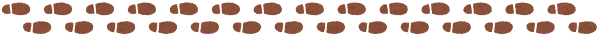

# 🔍 **Solve the Mystery!!**

When you think you have found the murderer, come back to this section and use the cell below to check your answer and see if you found the murderer:

Example:
```python
check_suspect("Reina Li")
```

In [ ]:
check_suspect("")

In [ ]:
check_suspect("")

In [ ]:
check_suspect("")

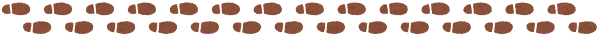

# 📕 **Case Closed!!!**

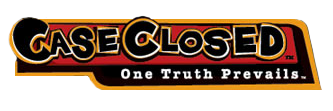